In [1]:
import pandas as pd

In [2]:
clicks = pd.read_csv('./datos/clicks.csv')

Primero analiso los datos del archivo, para ver cuales se pueden descartar, y lograr achicar el tamaño del data frame
===============================

In [3]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), float64(11), int64(6), object(2)
memory usage: 3.8+ MB


In [4]:
clicks['advertiser_id'].max()

8

In [5]:
clicks['advertiser_id'].min()

0

In [6]:
clicks['advertiser_id'] = clicks['advertiser_id'].astype('category')

Descarto action_id, ya que son todos nulos

In [7]:
clicks = clicks.drop(['action_id'], axis='columns')

In [8]:
clicks['source_id'].max()

10

In [9]:
clicks['source_id'].min()

0

In [10]:
clicks['source_id'] = clicks['source_id'].astype('category')

In [11]:
clicks['created'].head()

0    2019-03-06T22:42:12.755Z
1    2019-03-08T10:24:30.641Z
2    2019-03-08T15:24:16.069Z
3    2019-03-06T03:08:51.543Z
4    2019-03-06T03:32:55.570Z
Name: created, dtype: object

In [12]:
clicks['created'] = pd.to_datetime(clicks['created'])

In [13]:
clicks['country_code'].max()

6333597102633388268

In [14]:
clicks['country_code'].min()

6333597102633388268

Descarto country_code, ya que todos son iguales

In [15]:
clicks = clicks.drop(['country_code'], axis='columns')

In [16]:
clicks['latitude'].head()

0    1.205689
1    1.218924
2    1.205689
3    1.205689
4    1.205689
Name: latitude, dtype: float64

In [17]:
clicks['latitude'] = clicks['latitude'].astype('float32')

In [18]:
clicks['longitude'].head()

0    1.070234
1    1.071209
2    1.070234
3    1.070234
4    1.070234
Name: longitude, dtype: float64

In [19]:
clicks['longitude'] = clicks['longitude'].astype('float32')

In [20]:
clicks['carrier_id'].head()

0     1.0
1     4.0
2     6.0
3    45.0
4    45.0
Name: carrier_id, dtype: float64

In [21]:
clicks['carrier_id'].apply(lambda x: x % 1).sum()

0.0

In [22]:
clicks['carrier_id'].max()

116.0

In [23]:
clicks['carrier_id'].min()

0.0

In [24]:
clicks['carrier_id'].unique().size

56

In [25]:
clicks['carrier_id'] = clicks['carrier_id'].astype('category')

In [26]:
clicks['trans_id'].head()

0    iGgClCM9exiHF4K31g94XmvHEBSLKIY
1    MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM
2    vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU
3    YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM
4    X5XTOcYQovkl6yadYdAD7xioVGU9jiY
Name: trans_id, dtype: object

In [27]:
clicks['trans_id'].unique().size

26351

In [28]:
clicks['trans_id'] = clicks['trans_id'].astype('str')

In [29]:
clicks['os_minor'].unique().size

29

In [30]:
clicks['os_minor'] = clicks['os_minor'].astype('category')

In [31]:
clicks['agent_device'].unique().size

191

In [32]:
clicks['agent_device'] = clicks['agent_device'].astype('category')

In [33]:
clicks['os_major'].unique().size

13

In [34]:
clicks['os_major'] = clicks['os_major'].astype('category')

Descarto specs_brand, ya que no tenemos ninguna informacion al respecto

In [35]:
clicks = clicks.drop(['specs_brand'], axis='columns')

In [36]:
clicks['brand'].unique().size

14

In [37]:
clicks['brand'] = clicks['brand'].astype('category')

In [38]:
clicks['timeToClick'].head()

0     1.563
1       NaN
2       NaN
3    19.013
4    28.110
Name: timeToClick, dtype: float64

In [39]:
clicks['timeToClick'] = clicks['timeToClick'].astype('float32')

In [40]:
clicks['touchX'].head()

0    0.905
1      NaN
2    0.946
3    0.035
4    0.054
Name: touchX, dtype: float64

In [41]:
clicks['touchX'] = clicks['touchX'].astype('float32')

In [42]:
clicks['touchY'].head()

0    0.078
1      NaN
2    0.473
3    0.431
4    0.423
Name: touchY, dtype: float64

In [43]:
clicks['touchY'] = clicks['touchY'].astype('float32')

Descarto los valores de touchY que son mayores a q, ya que se supone que estan normalizados

In [44]:
clicks['touchY'] = clicks['touchY'].where(clicks['touchY'] <= 1)

In [45]:
clicks['touchX'] = clicks['touchX'].where(clicks['touchY'].notnull())

In [46]:
clicks['ref_type'].unique().size

4

In [47]:
clicks['ref_type'] = clicks['ref_type'].astype('category')

In [48]:
clicks['ref_hash'].max()

9221118223027605174

In [49]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 17 columns):
advertiser_id      26351 non-null category
source_id          26351 non-null category
created            26351 non-null datetime64[ns, UTC]
latitude           26351 non-null float32
longitude          26351 non-null float32
wifi_connection    26351 non-null bool
carrier_id         26340 non-null category
trans_id           26351 non-null object
os_minor           26339 non-null category
agent_device       3243 non-null category
os_major           26339 non-null category
brand              6235 non-null category
timeToClick        22977 non-null float32
touchX             17841 non-null float32
touchY             17841 non-null float32
ref_type           26351 non-null category
ref_hash           26351 non-null int64
dtypes: bool(1), category(8), datetime64[ns, UTC](1), float32(5), int64(1), object(1)
memory usage: 1.4+ MB


Analisis de Datos
===========================

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
clicks['created'].max()

Timestamp('2019-03-13 23:59:59.298000+0000', tz='UTC')

In [52]:
clicks['created'].min()

Timestamp('2019-03-05 01:17:30.663000+0000', tz='UTC')

In [75]:
clicks['hour'] = clicks['created'].dt.hour

In [82]:
clicksPerHour = clicks.groupby(['hour']).size()

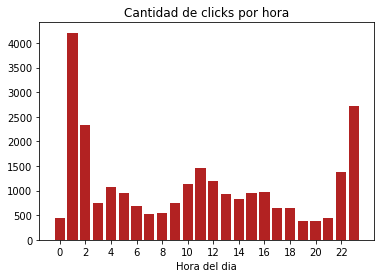

In [86]:
plt.bar(range(24), clicksPerHour, color='firebrick')
plt.xticks(np.arange(0, 24, 2))
plt.xlabel('Hora del dia')
plt.title('Cantidad de clicks por hora')
plt.savefig('./images/NumberOfClicksPerTimeOfDay.png', dpi=200)

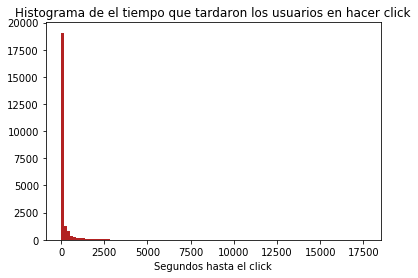

In [87]:
times = clicks['timeToClick'].values
plt.hist(times, bins=100, color='firebrick')
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click')
plt.savefig('./images/timesToClick.png', dpi=200)

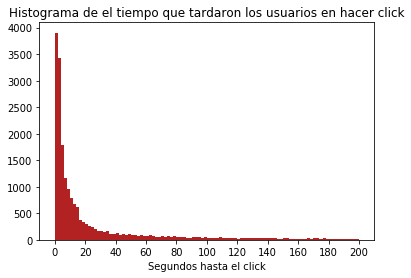

In [88]:
plt.hist(times, bins=100, range=(0, 200), color='firebrick')
plt.xticks(np.arange(0, 220, 20))
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click')
plt.savefig('./images/timesToClick2.png', dpi=200)

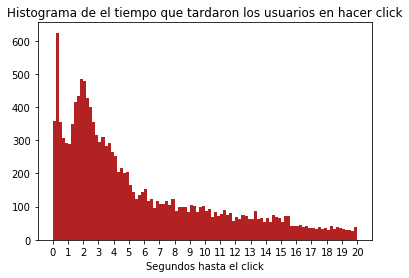

In [89]:
plt.hist(times, bins=100, range=(0, 20), color='firebrick')
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click')
plt.savefig('./images/timesToClick3.png', dpi=200)

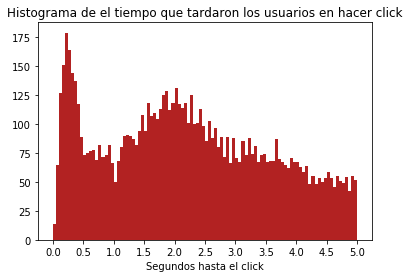

In [90]:
plt.hist(times, bins=100, range=(0, 5), color='firebrick')
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlabel('Segundos hasta el click')
plt.title('Histograma de el tiempo que tardaron los usuarios en hacer click')
plt.savefig('./images/timesToClick4.png', dpi=200)

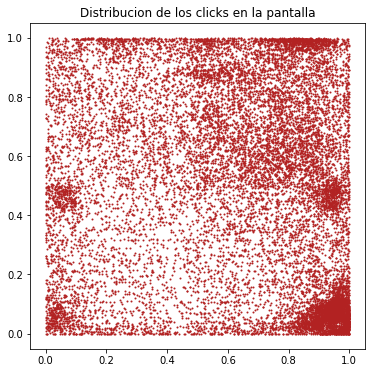

In [93]:
plt.figure(figsize=(6, 6))
plt.scatter(clicks['touchX'].values, clicks['touchY'].values, color='firebrick', s=1)
plt.title('Distribucion de los clicks en la pantalla')
plt.savefig('./images/clicksDistribution.png', dpi=200)